In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
enhancer_gene_pairs = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_gene_gRNAgroup_pair_table.at_scale.txt', sep = '\t')

/iblm/netapp/home/karthik/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
enhancer_gene_pairs.head()

,gRNAgroup.chr,gRNAgroup.start,gRNAgroup.stop,gRNAgroup,general_group,chr.targetgene,start.targetgene,stop.targetgene,ENSG.targetgene,targetgene_short_name,strand.targetgene,pairs
0,NTC,NTC,NTC,bassik_mch,NTC,chr10,28034777,28034778,ENSG00000150051,MKX,-,MKX:bassik_mch
1,NTC,NTC,NTC,bassik_mch,NTC,chr10,28287976,28287977,ENSG00000169126,ARMC4,-,ARMC4:bassik_mch
2,NTC,NTC,NTC,bassik_mch,NTC,chr10,28571017,28571018,ENSG00000150054,MPP7,-,MPP7:bassik_mch
3,NTC,NTC,NTC,bassik_mch,NTC,chr10,28821422,28821423,ENSG00000095787,WAC,+,WAC:bassik_mch
4,NTC,NTC,NTC,bassik_mch,NTC,chr10,28966271,28966272,ENSG00000095739,BAMBI,+,BAMBI:bassik_mch


In [4]:
enhancers = enhancer_gene_pairs[['gRNAgroup.chr', 'gRNAgroup.start', 'gRNAgroup.stop', 'gRNAgroup']]
enhancers = enhancers.drop_duplicates().reset_index(drop=True)
enhancers.head()

,gRNAgroup.chr,gRNAgroup.start,gRNAgroup.stop,gRNAgroup
0,NTC,NTC,NTC,bassik_mch
1,NTC,NTC,NTC,random_1
2,NTC,NTC,NTC,random_10
3,NTC,NTC,NTC,random_11
4,NTC,NTC,NTC,random_12


In [5]:
enhancers['gRNAgroup.start'] = enhancers['gRNAgroup.start'].replace({'NTC': np.nan}).astype(np.float64)
enhancers['gRNAgroup.stop'] = enhancers['gRNAgroup.stop'].replace({'NTC': np.nan}).astype(np.float64)


In [6]:
enhancers['position'] = (enhancers['gRNAgroup.start'] + enhancers['gRNAgroup.stop']) / 2
enhancers.head()

,gRNAgroup.chr,gRNAgroup.start,gRNAgroup.stop,gRNAgroup,position
0,NTC,NaN,NaN,bassik_mch,NaN
1,NTC,NaN,NaN,random_1,NaN
2,NTC,NaN,NaN,random_10,NaN
3,NTC,NaN,NaN,random_11,NaN
4,NTC,NaN,NaN,random_12,NaN


In [7]:
enhancers = enhancers[['gRNAgroup', 'position']]
enhancers.columns = ['enhancer', 'position']
enhancers.head()

,enhancer,position
0,bassik_mch,NaN
1,random_1,NaN
2,random_10,NaN
3,random_11,NaN
4,random_12,NaN


In [8]:
enhancers['enhancer'] = enhancers['enhancer'].apply(lambda x: x.split('_')[0])
enhancers.head()

,enhancer,position
0,bassik,NaN
1,random,NaN
2,random,NaN
3,random,NaN
4,random,NaN


In [12]:
enhancers[enhancers['enhancer'] == 'chr11.1734']

,enhancer,position
482,chr11.1734,33963390.5
483,chr11.1734,33963390.5


In [13]:
enhancers = enhancers.drop_duplicates()

In [25]:
enhancer_enhancer_results = pd.read_csv('/iblm/netapp/data1/external/Gasperini2019/processed/enhancer_enhancer_at_scale_20_cells_pseudocount_model.csv')
enhancer_enhancer_results.head()

,enhancer.1.list,enhancer.2.list,gene.list,enhancer.1.pvalue.list,enhancer.2.pvalue.list,interaction.coeff.list,interaction.pvalue.list
0,chr20.2320,chr20.2372,ENSG00000000419,0.000918,0.804149,0.551415,0.406083
1,chr11.2897,chr11.3041,ENSG00000002330,0.862578,0.574404,0.156746,0.752904
2,chr11.2920,chr11.3041,ENSG00000002330,0.723324,0.597343,0.441729,0.466672
3,chr11.3041,chr11.3163,ENSG00000002330,0.578553,0.599077,0.209589,0.695294
4,chr16.1863,chr16.1866,ENSG00000004779,0.926136,0.456520,0.370256,0.357975


In [26]:
enhancer_enhancer_results = enhancer_enhancer_results.merge(enhancers, how = 'left', left_on = 'enhancer.1.list', right_on = 'enhancer').rename(columns = {'enhancer': 'enhancer.1.group', 'position': 'enhancer.1.position'})
enhancer_enhancer_results = enhancer_enhancer_results.merge(enhancers, how = 'left', left_on = 'enhancer.2.list', right_on = 'enhancer').rename(columns = {'enhancer': 'enhancer.2.group', 'position': 'enhancer.2.position'})
enhancer_enhancer_results.head()

,enhancer.1.list,enhancer.2.list,gene.list,enhancer.1.pvalue.list,enhancer.2.pvalue.list,interaction.coeff.list,interaction.pvalue.list,enhancer.1.group,enhancer.1.position,enhancer.2.group,enhancer.2.position
0,chr20.2320,chr20.2372,ENSG00000000419,0.000918,0.804149,0.551415,0.406083,chr20.2320,48810711.0,chr20.2372,49057492.0
1,chr11.2897,chr11.3041,ENSG00000002330,0.862578,0.574404,0.156746,0.752904,chr11.2897,63334920.5,chr11.3041,64102754.5
2,chr11.2920,chr11.3041,ENSG00000002330,0.723324,0.597343,0.441729,0.466672,chr11.2920,63570596.5,chr11.3041,64102754.5
3,chr11.3041,chr11.3163,ENSG00000002330,0.578553,0.599077,0.209589,0.695294,chr11.3041,64102754.5,chr11.3163,64766156.0
4,chr16.1863,chr16.1866,ENSG00000004779,0.926136,0.456520,0.370256,0.357975,chr16.1863,23796280.5,chr16.1866,23833442.5


In [27]:
enhancer_enhancer_results['distance'] = np.abs(enhancer_enhancer_results['enhancer.1.position'] - enhancer_enhancer_results['enhancer.2.position'])
enhancer_enhancer_results.head()

,enhancer.1.list,enhancer.2.list,gene.list,enhancer.1.pvalue.list,enhancer.2.pvalue.list,interaction.coeff.list,interaction.pvalue.list,enhancer.1.group,enhancer.1.position,enhancer.2.group,enhancer.2.position,distance
0,chr20.2320,chr20.2372,ENSG00000000419,0.000918,0.804149,0.551415,0.406083,chr20.2320,48810711.0,chr20.2372,49057492.0,246781.0
1,chr11.2897,chr11.3041,ENSG00000002330,0.862578,0.574404,0.156746,0.752904,chr11.2897,63334920.5,chr11.3041,64102754.5,767834.0
2,chr11.2920,chr11.3041,ENSG00000002330,0.723324,0.597343,0.441729,0.466672,chr11.2920,63570596.5,chr11.3041,64102754.5,532158.0
3,chr11.3041,chr11.3163,ENSG00000002330,0.578553,0.599077,0.209589,0.695294,chr11.3041,64102754.5,chr11.3163,64766156.0,663401.5
4,chr16.1863,chr16.1866,ENSG00000004779,0.926136,0.456520,0.370256,0.357975,chr16.1863,23796280.5,chr16.1866,23833442.5,37162.0


In [28]:
enhancer_enhancer_results[enhancer_enhancer_results['enhancer.1.list'] == 'chr11.1735']

,enhancer.1.list,enhancer.2.list,gene.list,enhancer.1.pvalue.list,enhancer.2.pvalue.list,interaction.coeff.list,interaction.pvalue.list,enhancer.1.group,enhancer.1.position,enhancer.2.group,enhancer.2.position,distance
499,chr11.1735,chr11.1766,ENSG00000085063,9.983408e-21,0.850905,-0.050421,0.917518,chr11.1735,33966493.5,chr11.1766,34449105.5,482612.0
500,chr11.1735,chr11.1777,ENSG00000085063,1.172345e-20,0.944108,0.003413,0.993791,chr11.1735,33966493.5,chr11.1777,34622064.5,655571.0
501,chr11.1735,chr11.1778,ENSG00000085063,2.540383e-21,0.938488,-0.608793,0.154347,chr11.1735,33966493.5,chr11.1778,34625321.5,658828.0
1007,chr11.1735,chr11.1766,ENSG00000110429,4.604400e-01,0.525906,-0.152398,0.889698,chr11.1735,33966493.5,chr11.1766,34449105.5,482612.0
1008,chr11.1735,chr11.1777,ENSG00000110429,4.191340e-01,0.986361,0.465335,0.613054,chr11.1735,33966493.5,chr11.1777,34622064.5,655571.0
1009,chr11.1735,chr11.1778,ENSG00000110429,6.202338e-01,0.410229,-4.033985,0.051994,chr11.1735,33966493.5,chr11.1778,34625321.5,658828.0
1010,chr11.1735,chr11.1787,ENSG00000110429,5.099942e-01,0.355104,-1.003837,0.407205,chr11.1735,33966493.5,chr11.1787,34779995.0,813501.5
1029,chr11.1735,chr11.1766,ENSG00000110435,1.218228e-01,0.820801,0.808781,0.244559,chr11.1735,33966493.5,chr11.1766,34449105.5,482612.0
1030,chr11.1735,chr11.1777,ENSG00000110435,1.644471e-01,0.014236,-0.209452,0.785401,chr11.1735,33966493.5,chr11.1777,34622064.5,655571.0
1031,chr11.1735,chr11.1778,ENSG00000110435,9.469521e-02,0.590464,1.119902,0.033769,chr11.1735,33966493.5,chr11.1778,34625321.5,658828.0


In [29]:
enhancer_enhancer_results.sort_values(by = 'interaction.pvalue.list').head(10)

,enhancer.1.list,enhancer.2.list,gene.list,enhancer.1.pvalue.list,enhancer.2.pvalue.list,interaction.coeff.list,interaction.pvalue.list,enhancer.1.group,enhancer.1.position,enhancer.2.group,enhancer.2.position,distance
2625,chr2.1137,chr2.1212,ENSG00000158019,4.359232e-01,2.449652e-01,5.152382,3.106914e-25,chr2.1137,27414565.5,chr2.1212,28589787.0,1175221.5
4260,chr6.1231,chr6.1282,ENSG00000197903,9.573064e-01,7.761337e-01,2.502823,1.742086e-08,chr6.1231,27205236.5,chr6.1282,27640457.5,435221.0
1240,chr1.12443,chr1.12449,ENSG00000116903,6.949072e-01,1.958354e-01,3.733292,3.085172e-06,chr1.12443,231182745.0,chr1.12449,231295936.5,113191.5
4546,chr6.1282,chr6.1347,ENSG00000232040,1.613261e-01,6.856610e-01,2.824760,2.069396e-05,chr6.1282,27640457.5,chr6.1347,28442557.0,802099.5
1503,chr6.1231,chr6.1282,ENSG00000124635,7.082608e-01,4.078616e-01,2.834892,2.290398e-05,chr6.1231,27205236.5,chr6.1282,27640457.5,435221.0
4195,chr6.1231,chr6.1282,ENSG00000196787,4.040698e-01,8.288879e-01,2.618857,3.933367e-05,chr6.1231,27205236.5,chr6.1282,27640457.5,435221.0
3310,chr12.1895,chr12.1897,ENSG00000170653,1.179528e-03,3.820116e-01,2.078412,3.389024e-04,chr12.1895,53765112.5,chr12.1897,53815467.0,50354.5
1935,chr11.1734,chr11.1735,ENSG00000135363,3.932370e-115,1.867729e-247,2.345832,3.621805e-04,chr11.1734,33963390.5,chr11.1735,33966493.5,3103.0
2470,chr11.2735,chr11.2790,ENSG00000149485,2.113387e-05,2.874386e-01,1.462565,4.340696e-04,chr11.2735,61637957.0,chr11.2790,62164124.5,526167.5
3333,chr3.770,chr3.771,ENSG00000170876,3.542323e-02,5.817896e-02,3.815396,5.219628e-04,chr3.770,14274279.0,chr3.771,14276055.5,1776.5


In [30]:
enhancer_enhancer_results.to_csv('/iblm/netapp/data1/external/Gasperini2019/processed/enhancer_distance_at_scale_pairs.csv', index=False)

<AxesSubplot:xlabel='distance', ylabel='interaction.coeff.list'>

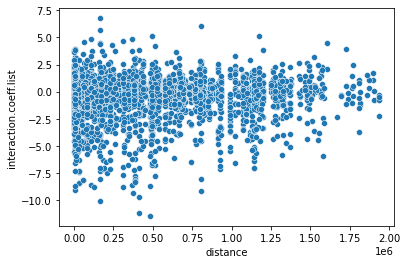

In [31]:
sns.scatterplot(data = enhancer_enhancer_results, x = 'distance', y = 'interaction.coeff.list')

In [41]:
enhancer_enhancer_results.to_csv('/iblm/netapp/data1/external/Gasperini2019/processed/enhancer_enhancer_at_scale_distances.csv', index = False)